# Clustering

### K-means clustering - example I

Ex.1 Please analyse the function parameters and generated output

In [173]:
from sklearn.datasets import make_blobs 
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

Ex.2 Please call make_blob and generate a dataset with 120 samples, 2 features, 4 centres (clusters), and cluster_std=0.40.

In [174]:
data_x, data_y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.40, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)

Ex.3 Analyse the x and y shape.

In [175]:
print(f"x: {data_x.shape}")

print(f"y: {data_y.shape}")

x: (120, 2)
y: (120,)


Ex.4 Plot the data samples in X to see the clusters.
All sklearn algorithms have a similar way of running:

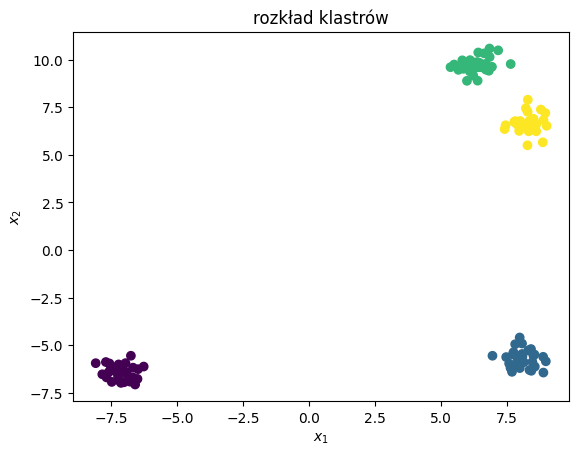

In [176]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(data_x[:,0],data_x[:,1], c = data_y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("rozkład klastrów")
plt.show()

Ex.5 Run the implemented KMeans function K-Means, fit the model and predict the outcome.

In [177]:
from sklearn.cluster import KMeans
kmeans = KMeans(4)
kmeans.fit(data_x)
y_pred = kmeans.predict(data_x)

Ex.6 Plot the results in order to see whether the clustering worked.

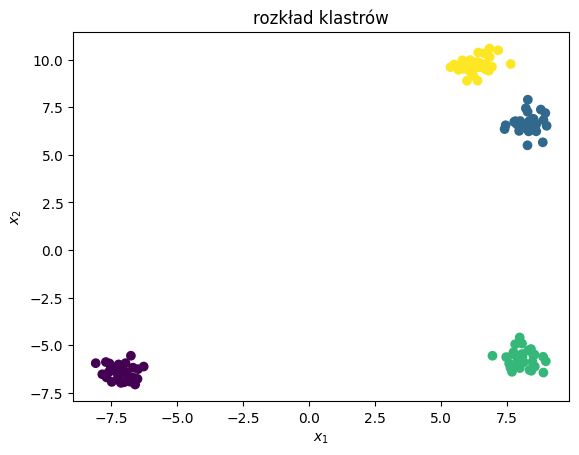

In [178]:
plt.scatter(data_x[:,0],data_x[:,1], c = y_pred)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("rozkład klastrów")
plt.show()

Ex.7 Calculate inertia Inertia_ or Dunn index Package jgmcvi (optional).

In [179]:
print(f"inertia : {kmeans.inertia_}")

inertia : 45.872576295127686


### K-means clustering - example II

Ex.1 Plot the data

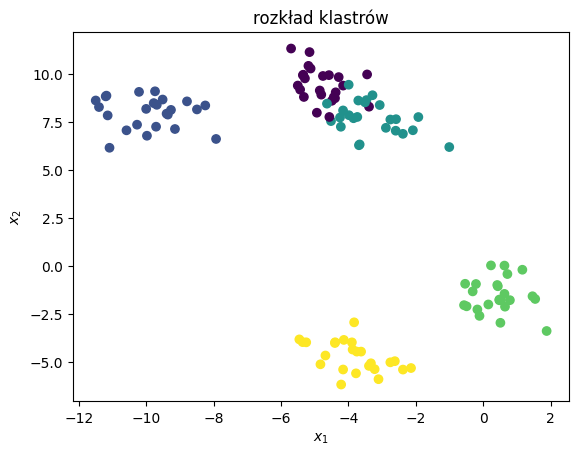

In [180]:
data_x, data_y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.80, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
plt.scatter(data_x[:,0],data_x[:,1], c = data_y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("rozkład klastrów")
plt.show()

Ex.2 Predict for the same nb. of clusters = 5.

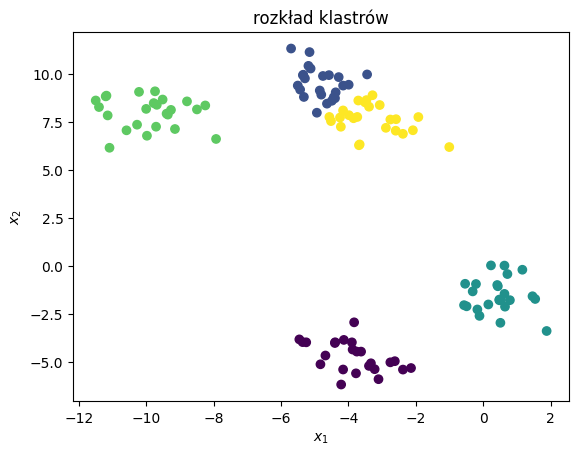

In [181]:
kmeans = KMeans(5)
kmeans.fit(data_x)
y_pred = kmeans.predict(data_x)
plt.scatter(data_x[:,0],data_x[:,1], c = y_pred)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("rozkład klastrów")
plt.show()

Ex.3 Predict for 2 instead of 5 clusters.

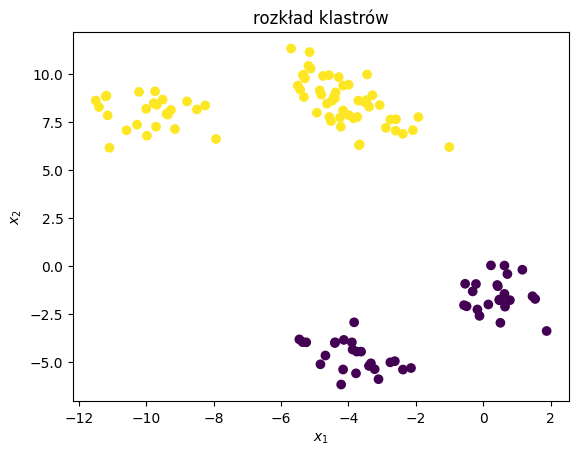

In [182]:
kmeans = KMeans(2)
kmeans.fit(data_x)
y_pred = kmeans.predict(data_x)
plt.scatter(data_x[:,0],data_x[:,1], c = y_pred)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("rozkład klastrów")
plt.show()

## K-means ++

Ex.1 Run K-Means for the previous ex. while changing the parameter in KMeans function:

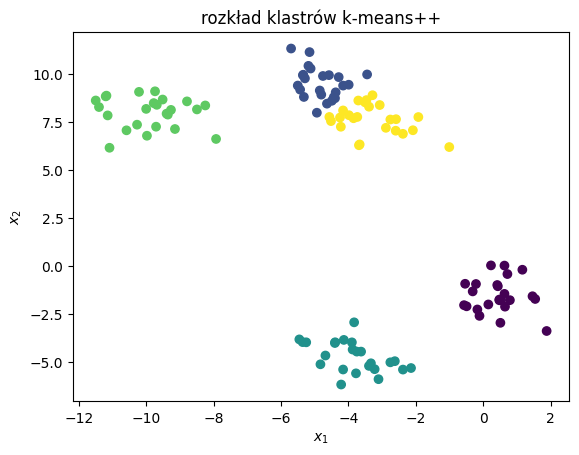

In [183]:

kmeans = KMeans(5,init='k-means++')
kmeans.fit(data_x)
y_pred = kmeans.predict(data_x)
plt.scatter(data_x[:,0],data_x[:,1], c = y_pred)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("rozkład klastrów k-means++")
plt.show()

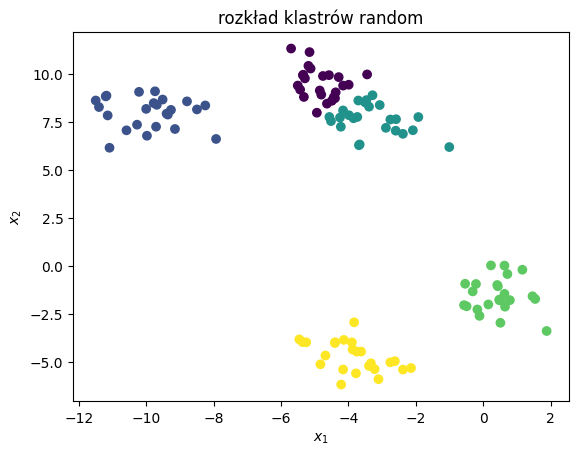

In [184]:
kmeans = KMeans(5,init='random')
kmeans.fit(data_x)
y_pred = kmeans.predict(data_x)
plt.scatter(data_x[:,0],data_x[:,1], c = y_pred)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("rozkład klastrów random")
plt.show()

Ex.2 Calculate inertia or Dunn index.

In [185]:
print(f"inertia : {kmeans.inertia_}")

inertia : 152.09847643956962


## Elbow method

Ex.1 Run K-Means for a range of clusters using a for loop and collecting the distortions (inertia) into a list.

In [186]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

distortion = []
for i in range(1,20):
    kmeans = KMeans(i,init='random')
    kmeans.fit(x)
    distortion.append(kmeans.inertia_)

Ex.2 Plot the distortions of K-Means.

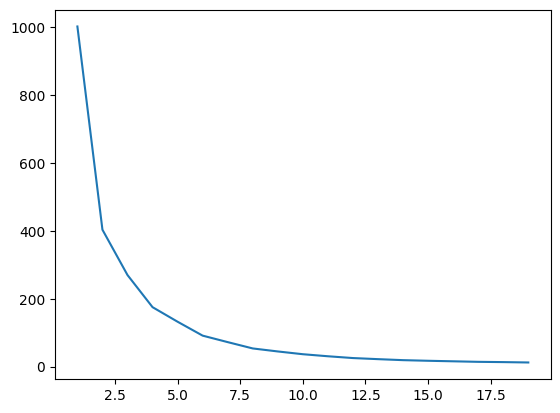

In [187]:
plt.plot([i for i in range(1,20)],distortion)

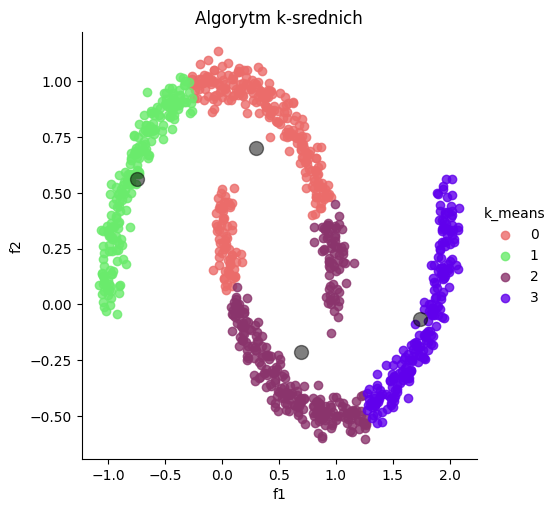

In [188]:

kmeans = KMeans(4,init='random')
kmeans.fit(x)
y_km = kmeans.predict(x)
centers = kmeans.cluster_centers_
#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c','#8a346c','#6000ec']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

Clustering II - hierarchical methods

Ex.1 Plot the data.

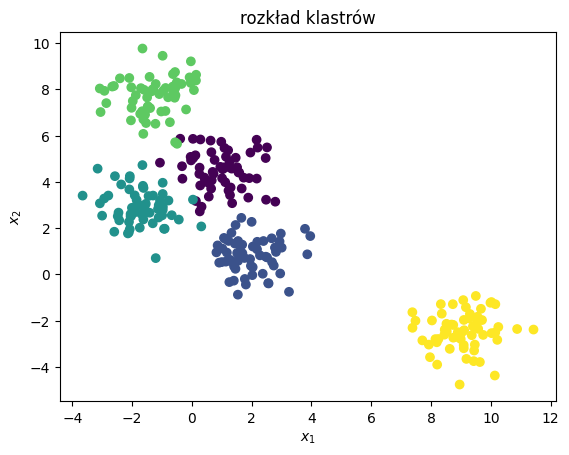

In [189]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)
plt.scatter(X[:,0],X[:,1], c = y_true)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("rozkład klastrów")
plt.show()

Ex.2 Use the Means function with k=2 to assign points to clusters.

In [190]:
kmeans = KMeans(2,init='random')
kmeans.fit(X)

KMeans(init='random', n_clusters=2)

Ex.3 Use the scipy libraries to draw the dendrogram for the data

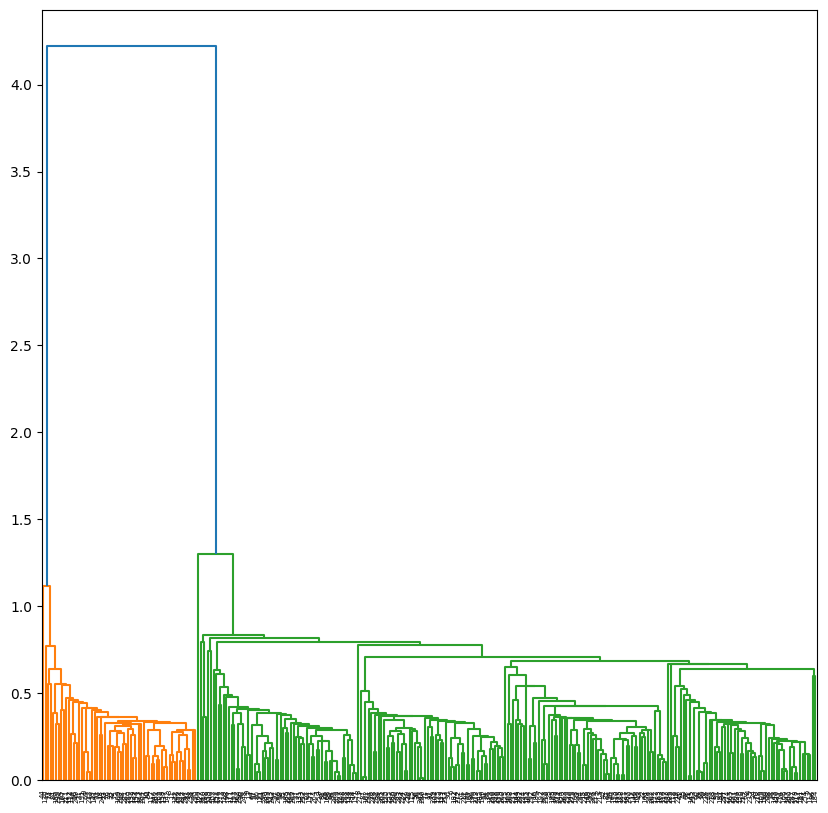

In [191]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
plt.show()

Ex.4 Something this makes clear is that visualizing the dengrogram is useful, but it's not for big dataset. Create a smaller dataset to draw a dendogram.

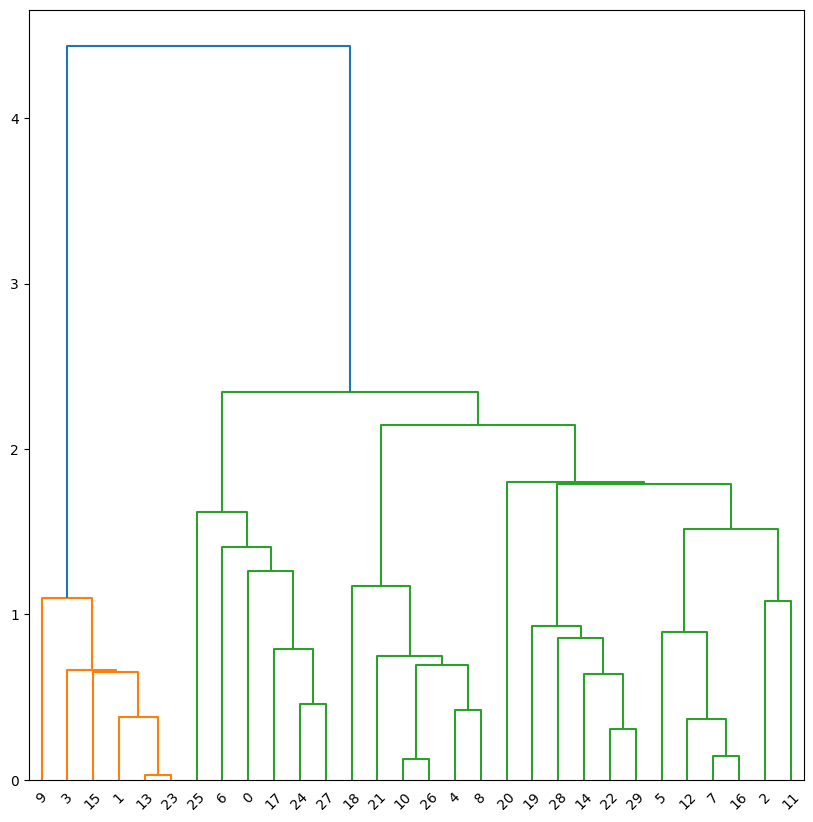

In [192]:
X, y_true = make_blobs(n_samples=30, centers=5,
                       cluster_std=0.8, random_state=0)
Z = linkage(X)
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
plt.show()

Agglomerative clustering

In [193]:
df = pd.read_csv("shopping_data.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Ex.5 Please read the dataset and choose columns to further analysis. The dataset contains 200 records and 5 attributes. Use only Annual Income (in thousands of dollars) and Spending

In [194]:
df = df[["Annual Income (k$)", "Spending Score (1-100)"]]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Ex.6 Create a dendrogram to chose the appropriate k value.

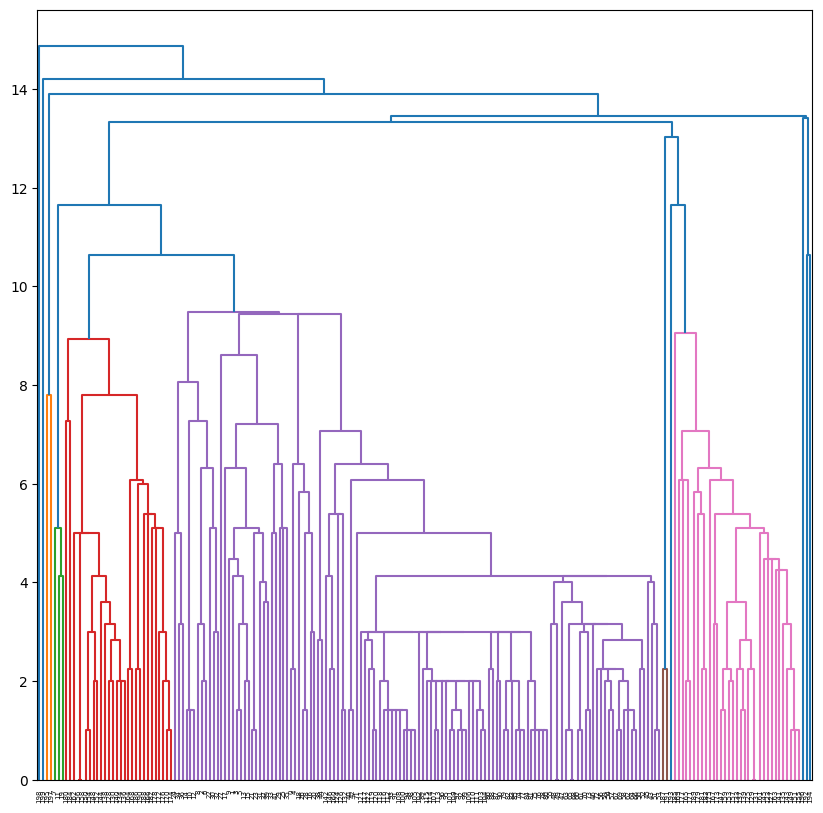

In [195]:
Z = linkage(df)
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
plt.show()

Ex.7 Analyse results for different linkage values - single, average,complete linkage and Ward. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters. (pl. Celem zadania będzie porównanie działania metody średnich połączeń (ang. avarage linkage), metody Warda, pojedynczego połączenia (ang. single linkage) oraz pełnego wiązania (ang. complete linkage).).

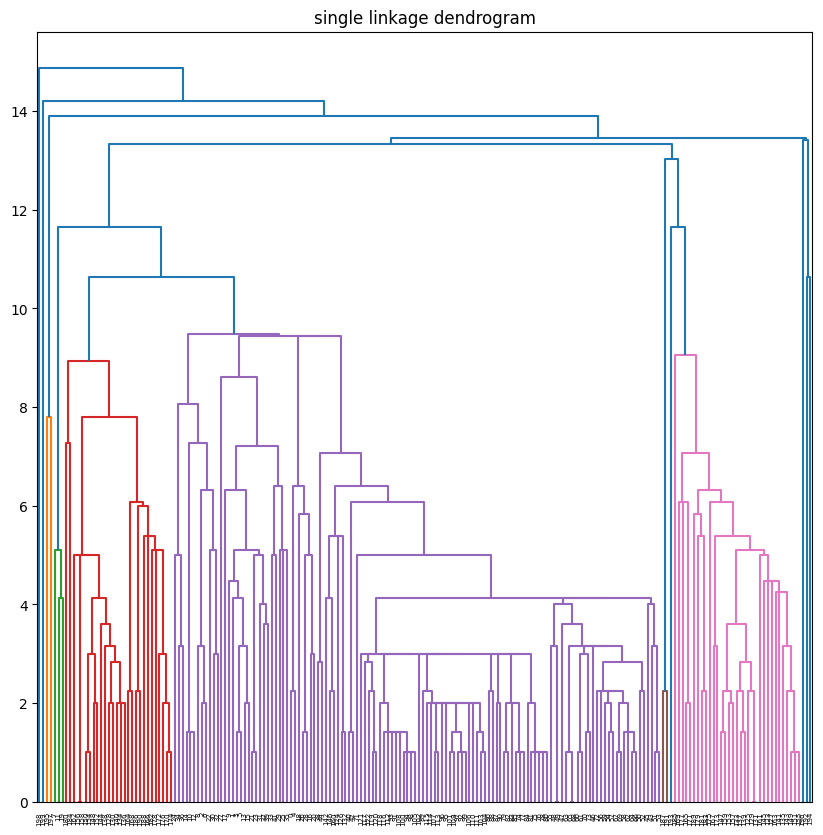

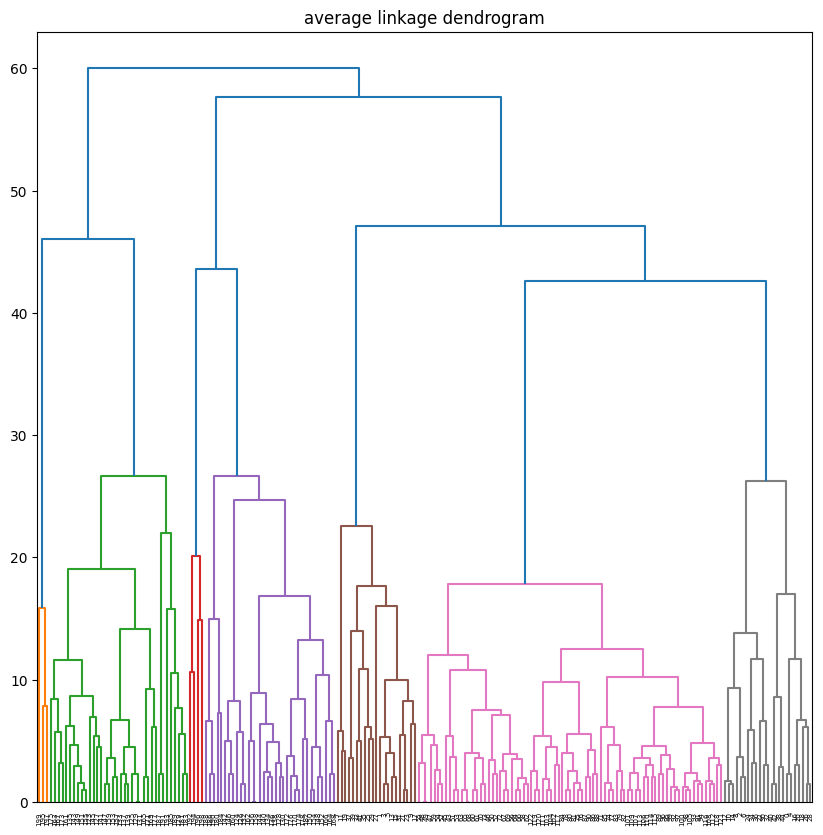

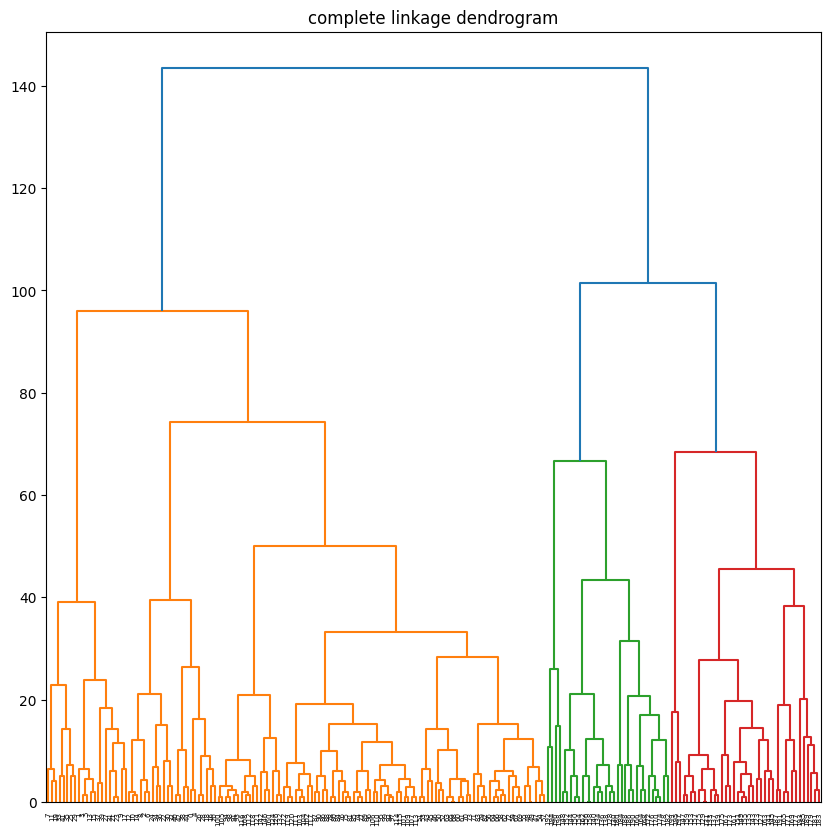

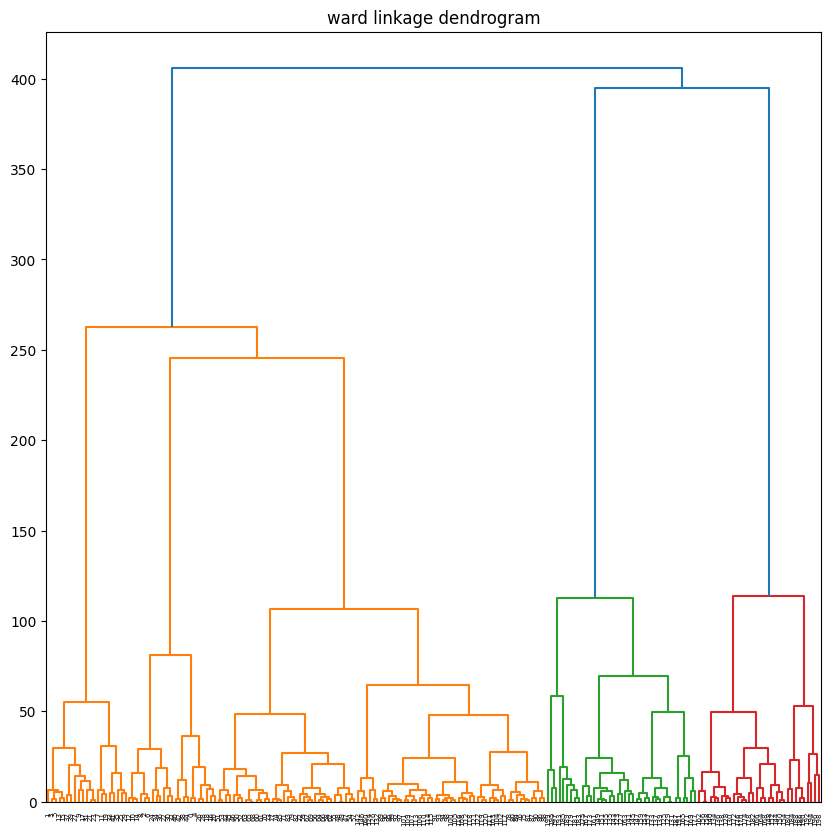

In [196]:
for link_type in ['single', 'average', 'complete', 'ward']:
    Z = linkage(df, link_type)
    fig = plt.figure(figsize=(10, 10))
    dn = dendrogram(Z)
    plt.title(link_type + " linkage dendrogram")
    plt.show()

Ex.8 Use the AgglomerativeClustering class of the sklearn.cluster library to build the model predict clusters.
Ex.9 Plot the clusters to see how actually our data has been clustered.

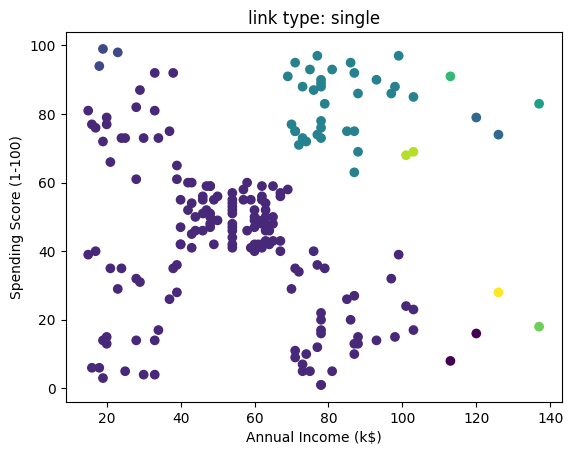

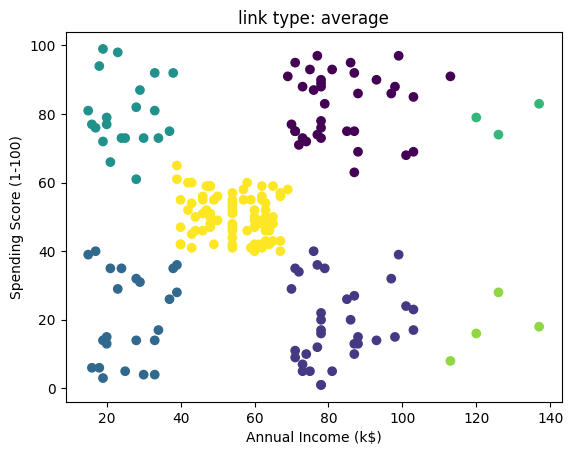

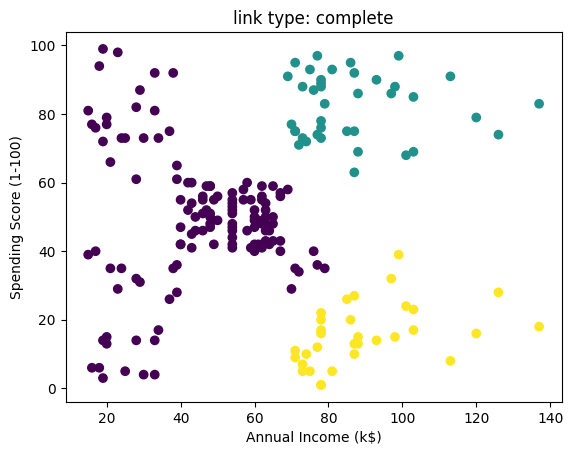

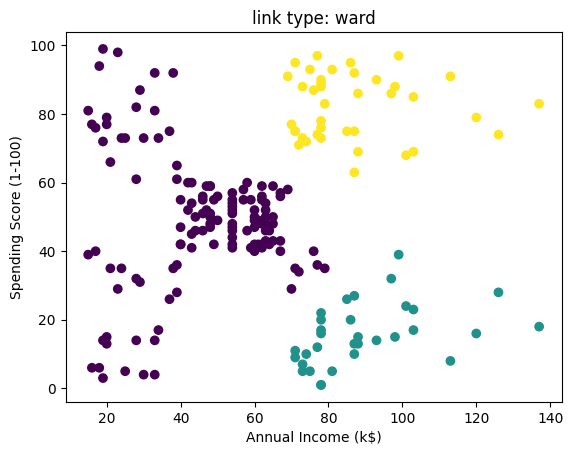

In [218]:
from sklearn.cluster import AgglomerativeClustering
cluster_nr = [10,7,3,3]

for n,link_type in enumerate(['single', 'average', 'complete', 'ward']):
    AggClust = AgglomerativeClustering(n_clusters=cluster_nr[n],linkage = link_type)
    AggClust.fit(df)
    y_pred = AggClust.fit_predict(df)
    
    plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"], c = y_pred)
    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)")
    plt.title("link type: "+link_type)
    plt.show()


##### Selecting the number of clusters with silhouette analysis on KMeans clustering

Ex.1 Create the dataset

In [198]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

Ex.2 Determine the cluster range [2,3….]

In [199]:
cluster_range = [i for i in range(1,20)]

Ex.3 Iterate for all the values in cluster range

silhouette score:
k = 2 : 0.7049787496083262


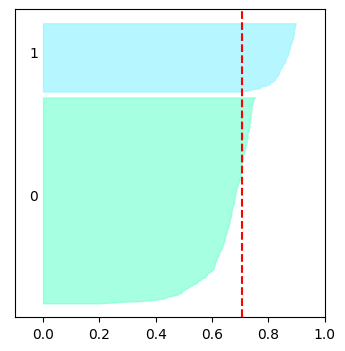

silhouette score:
k = 3 : 0.5882004012129721


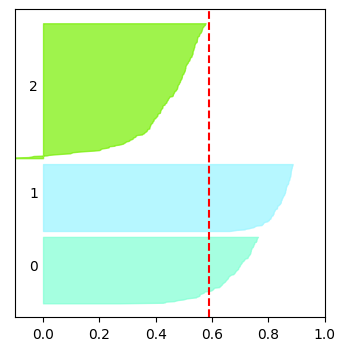

silhouette score:
k = 4 : 0.6505186632729437


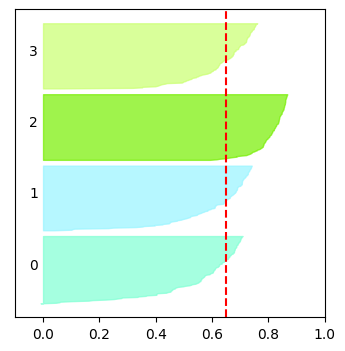

silhouette score:
k = 5 : 0.5745029081702377


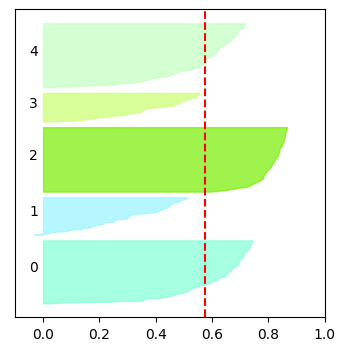

silhouette score:
k = 6 : 0.5049931260116814


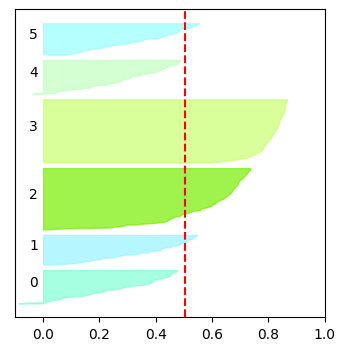

silhouette score:
k = 7 : 0.37895441712578953


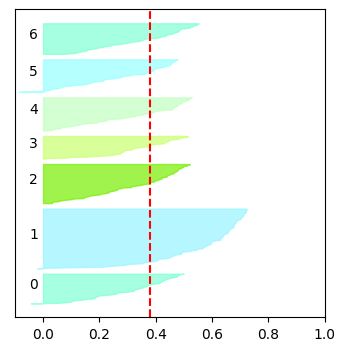

silhouette score:
k = 8 : 0.39524064731852593


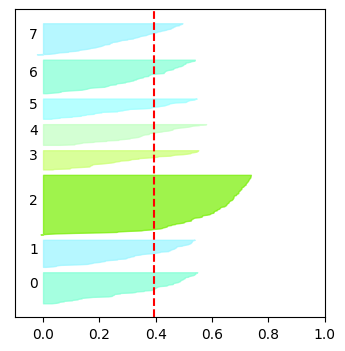

silhouette score:
k = 9 : 0.32497192525959756


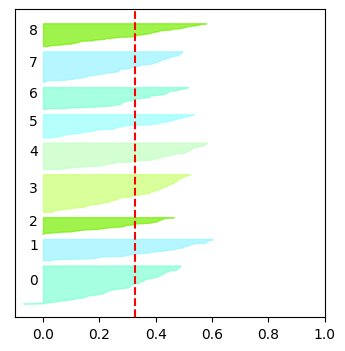

In [213]:
from sklearn.metrics import silhouette_score,silhouette_samples

color = ["#7FFFD4","#98F5FF","#76EE00","#CAFF70","#C1FFC1","#97FFFF","#7FFFD4","#98F5FF","#76EE00","#CAFF70"]

for i in range(2,10):
    kmeans = KMeans(i,init='random')
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    sil = silhouette_score(X,y_pred)
    print("silhouette score:")
    print(f"k = {i} : {sil}")
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(4, 4)
    y_lower = 10
    sil_samples = silhouette_samples(X, y_pred)
    for cluster_nr in range(i):
        cluster = sil_samples[y_pred == cluster_nr]
        cluster.sort()
        size_cluster = cluster.shape[0]
        y_upper = y_lower + size_cluster

        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster,
            facecolor=color[cluster_nr],
            edgecolor=color[cluster_nr],
            alpha=0.7,
        )
        ax.text(-0.05, y_lower + 0.5 * size_cluster, str(cluster_nr))
        y_lower = y_upper + 10
    plt.axvline(sil,color="#FF0000",linestyle = '--')
    plt.yticks([])
    plt.xlim([-0.1,1])
    plt.show()

best k for clustering is 4

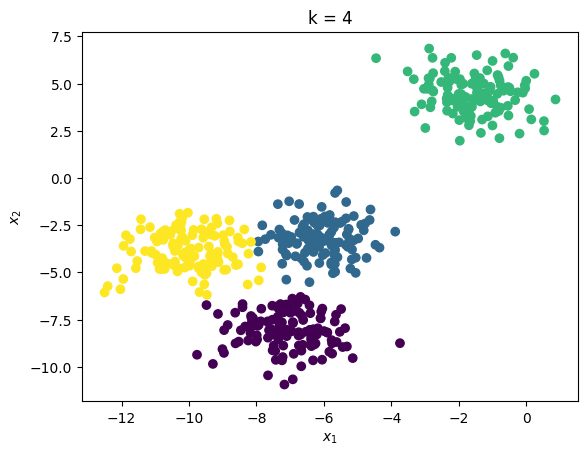

In [215]:
kmeans = KMeans(4,init='random')
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:,0],X[:,1], c = y_pred)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("k = 4")
plt.show()

### DBSCAN - density based clusterring

Ex. Compare DBSCAN algorithm with k-means on the moon dataset.

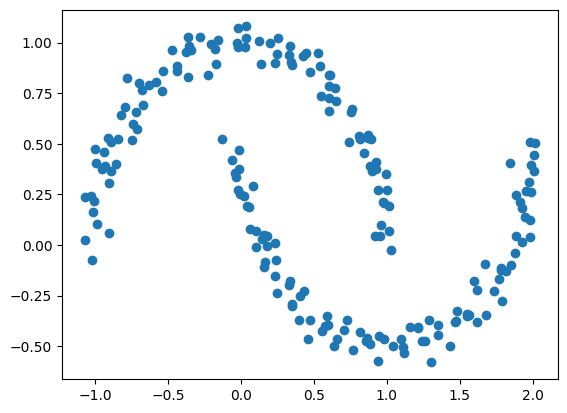

In [216]:
from sklearn.datasets import make_blobs, make_moons, make_circles

x, y = make_moons(n_samples=200, noise=.05, random_state=0)
plt.scatter(x[:,0],x[:,1])
plt.show()

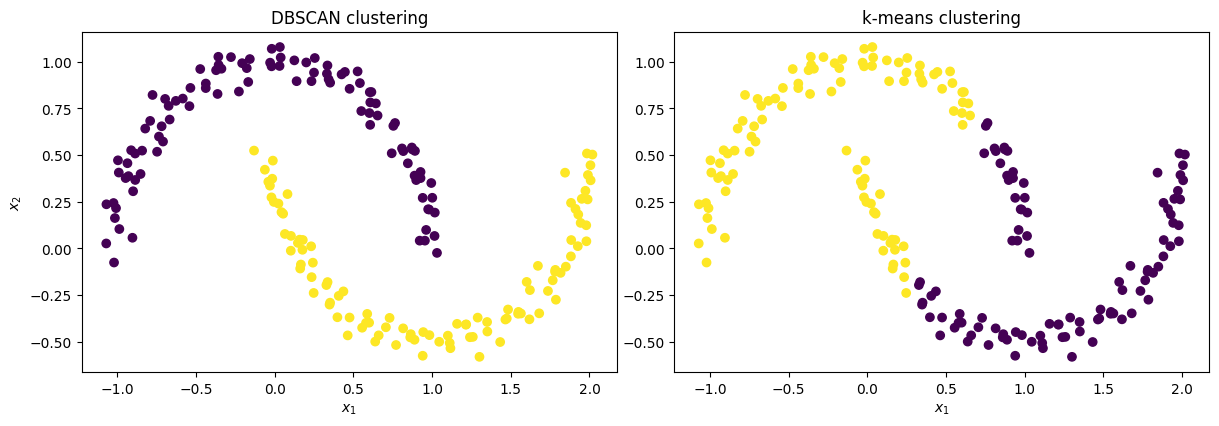

In [232]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3)
dbscan.fit(x)

kmeans = KMeans(2,init='random')
kmeans.fit(x)
y_pred2 = kmeans.predict(x)

y_pred = dbscan.fit_predict(x)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
fig.tight_layout()
ax1.scatter(x[:,0],x[:,1], c = y_pred)
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title("DBSCAN clustering")

ax2.scatter(x[:,0],x[:,1], c = y_pred2)
ax2.set_xlabel("$x_1$")

ax2.set_title("k-means clustering")
plt.show()
